In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [2]:
data1 = pd.read_csv("C:/Users/student/Data Minning/summaryDepreST-CAT.csv")
data2 = pd.read_csv("C:/Users/student/Data Minning/surveysDepreST-CAT.csv")
data3 = pd.read_csv("C:/Users/student/Data Minning/featureSet2weeksDepreST-CAT.csv")
data = data1.merge(data2, on = 'id')
data = data.merge(data3, on = 'id')
print(data.shape)
print(list(data.columns))
data.head()

(369, 607)
['id', 'inCalls', 'outCalls', 'allCalls', 'inText', 'outText', 'allText', 'allLogs', 'phq9_x', 'gad7_x', 'appVersion', 'PHQ - Q1', 'PHQ - Q2', 'PHQ - Q3', 'PHQ - Q4', 'PHQ - Q5', 'PHQ - Q6', 'PHQ - Q7', 'PHQ - Q8', 'PHQ - Q9', 'PHQ - Total', 'GAD - Q1', 'GAD - Q2', 'GAD - Q3', 'GAD - Q4', 'GAD - Q5', 'GAD - Q6', 'GAD - Q7', 'GAD - Total', 'Gender', 'Age', 'StudentStatus', 'PriorDepressionTreatment', 'Remote', 'COVID', 'Group', 'Timestamp', 'inTexts0_Absolute energy', 'inTexts0_Area under the curve', 'inTexts0_Autocorrelation', 'inTexts0_Centroid', 'inTexts0_ECDF Percentile Count_0', 'inTexts0_ECDF Percentile Count_1', 'inTexts0_ECDF Percentile_0', 'inTexts0_ECDF Percentile_1', 'inTexts0_ECDF_0', 'inTexts0_ECDF_1', 'inTexts0_ECDF_2', 'inTexts0_ECDF_3', 'inTexts0_ECDF_4', 'inTexts0_ECDF_5', 'inTexts0_ECDF_6', 'inTexts0_ECDF_7', 'inTexts0_ECDF_8', 'inTexts0_ECDF_9', 'inTexts0_Entropy', 'inTexts0_FFT mean coefficient_0', 'inTexts0_FFT mean coefficient_1', 'inTexts0_FFT mean coef

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9_x,gad7_x,...,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate,phq9_y,gad7_y
0,8SEHPRKH5,2699,1635,4334,271,159,430,4764,11,9,...,4.045134e+05,3.154076e+05,2.307977e+05,177738.097688,147068.120980,128451.466641,116002.530161,4.0,11,9
1,9UK1BSBLV,1963,37,2000,3497,104,3601,5601,6,1,...,6.075872e+02,4.647918e+02,2.988297e+02,182.340760,112.353802,71.603635,47.553689,6.0,6,1
2,8LOAAXQ52,1820,1319,3139,6806,0,6806,9945,8,5,...,7.011985e+06,4.160517e+06,1.927105e+06,939889.397772,623484.349712,575110.868332,613022.998698,2.0,8,5
3,3NL2J473W,1653,347,2000,548,243,791,2791,12,8,...,6.962548e+02,2.341504e+02,7.659223e+01,39.255697,40.123745,50.110467,60.012478,5.0,12,8
4,OVW13SMGC,1648,352,2000,1544,812,2356,4356,3,5,...,3.925101e+02,2.744714e+02,1.691722e+02,104.908265,69.412641,49.783911,38.477216,2.0,3,5


In [3]:
v1 = "inText"
v2 = "outText"
df = data[[v1, v2]]
df.head()

,inText,outText
0,271,159
1,3497,104
2,6806,0
3,548,243
4,1544,812


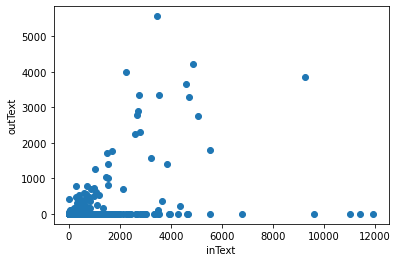

In [4]:
plt.figure()
plt.scatter(df[v1], df[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
cs = kmeans.labels_

In [6]:
df["cluster"] = cs
df.head()

C:\Users\student\AppData\Local\Temp/ipykernel_9608/845050371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


,inText,outText,cluster
0,271,159,0
1,3497,104,2
2,6806,0,2
3,548,243,0
4,1544,812,0


In [7]:
c0 = df[df["cluster"] == 0]
print(c0.shape)
c1 = df[df["cluster"] == 1]
print(c1.shape)
c2 = df[df["cluster"] == 2]
print(c2.shape)
c3 = df[df["cluster"] == 3]
print(c3.shape)
c4 = df[df["cluster"] == 4]
print(c4.shape)

(321, 3)
(5, 3)
(43, 3)
(0, 3)
(0, 3)


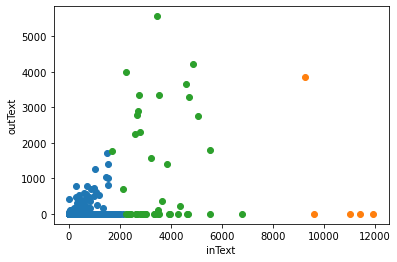

In [8]:
plt.figure()
plt.scatter(c0[v1], c0[v2])
plt.scatter(c1[v1], c1[v2])
plt.scatter(c2[v1], c2[v2])
plt.scatter(c3[v1], c3[v2])
plt.scatter(c4[v1], c4[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()

# Lab Instructions
* Chose different features for v1 and v2, why did you choose these features?
* Try for five to ten different random_state, what do you observe?
* Add or remove a cluster, how many clusters makes the most sense for your features?
* Add comments to the code to explain what each piece does
* Make the notebooks into a professional report with headings, markdown cell explanations, and print statements

Challenge for participation points: compare k-means with DBSCAN and Hierarchical clustering

In [9]:
v1 = "inCalls"
v2 = "outCalls"
df = data[[v1, v2]]
df.head()
# this sets the variables that are being used from the data and prints the first five data points for the columns out of the  
# variables data 

,inCalls,outCalls
0,2699,1635
1,1963,37
2,1820,1319
3,1653,347
4,1648,352


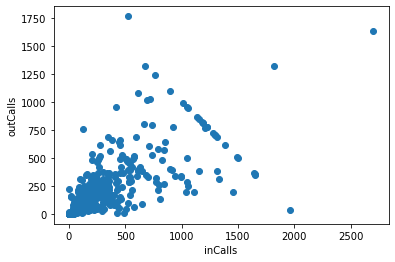

In [10]:
plt.figure()
plt.scatter(df[v1], df[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()
# this section of code takes the infromation from the table above and the rest of the data points from the dataframe 
# and then makes the data points into a graph

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=5).fit(df)
cs = kmeans.labels_
# it creats the aspects of how the cluster in the graph would be split up

In [12]:
df["cluster"] = cs
df.head()
# this resets the index above and sets and the varibles by adding a thrid column that labels what cluster that they are in

C:\Users\student\AppData\Local\Temp/ipykernel_9608/4019823309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


,inCalls,outCalls,cluster
0,2699,1635,3
1,1963,37,3
2,1820,1319,3
3,1653,347,3
4,1648,352,3


In [13]:
c0 = df[df["cluster"] == 0]
print(c0.shape)
c1 = df[df["cluster"] == 1]
print(c1.shape)
c2 = df[df["cluster"] == 2]
print(c2.shape)
c3 = df[df["cluster"] == 3]
print(c3.shape)
c4 = df[df["cluster"] == 4]
print(c4.shape)
# this designates the different clusters into the dataframe 

(60, 3)
(113, 3)
(156, 3)
(26, 3)
(14, 3)


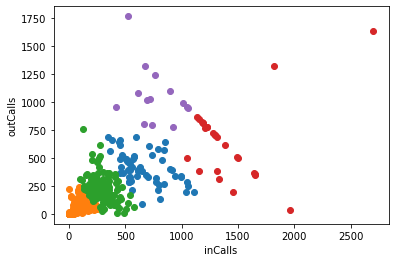

In [14]:
plt.figure()
plt.scatter(c0[v1], c0[v2])
plt.scatter(c1[v1], c1[v2])
plt.scatter(c2[v1], c2[v2])
plt.scatter(c3[v1], c3[v2])
plt.scatter(c4[v1], c4[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()
# this recreates the original graph with the k-means and cluster variables and splits the clusters up by changing the 
# color of the data points to designate the different clusters visually 

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


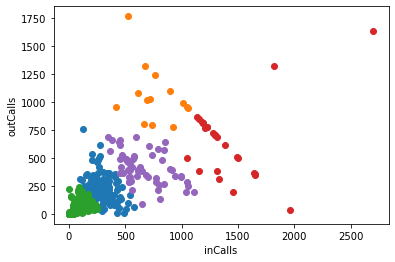

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


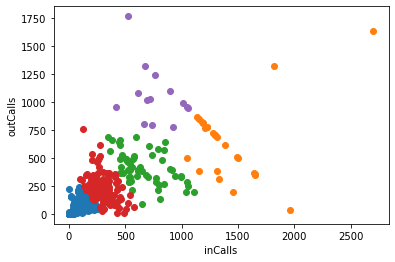

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


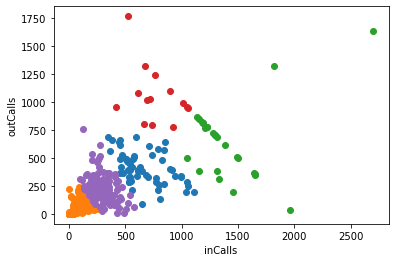

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


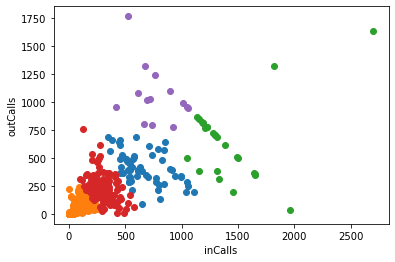

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


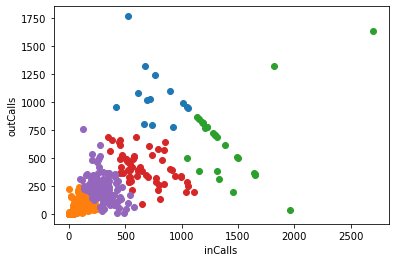

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


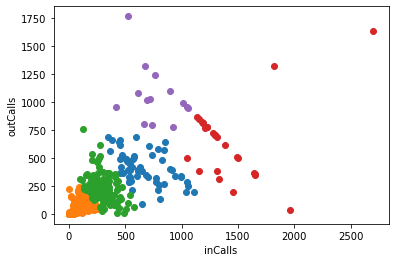

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


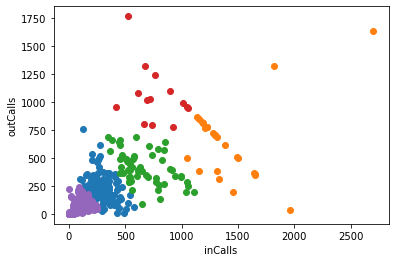

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


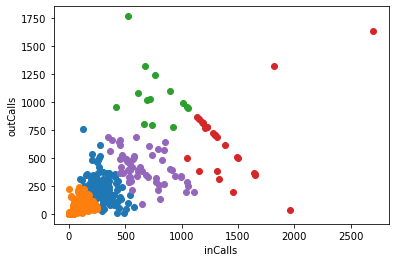

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


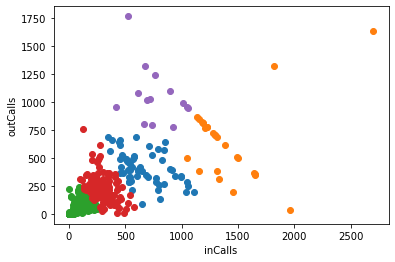

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2451146045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


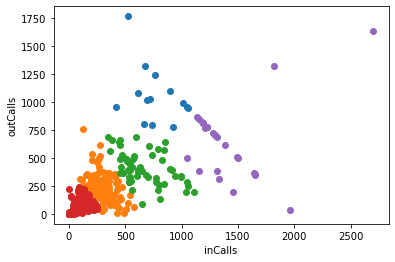

In [15]:
k = 5
for i in range(10):
    kmeans = KMeans(n_clusters=k, random_state=i).fit(df)
    cs = kmeans.labels_
    df["cluster"] = cs
    c0 = df[df["cluster"] == 0]
    c1 = df[df["cluster"] == 1]
    c2 = df[df["cluster"] == 2]
    c3 = df[df["cluster"] == 3]
    c4 = df[df["cluster"] == 4]
    plt.figure()
    plt.scatter(c0[v1], c0[v2])
    plt.scatter(c1[v1], c1[v2])
    plt.scatter(c2[v1], c2[v2])
    plt.scatter(c3[v1], c3[v2])
    plt.scatter(c4[v1], c4[v2])
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.show()
    plt.close()
# this is a for loop that sets a range of ten that with every instace will change the random state of the clusters 
# so that a graph is outputted for every random states different clusters from a random state of 0 up to 10

### 1. Features for v1 and v2 were changed to inCalls and outCalls, because I wanted to see the correlation between the incalls and outcalls to be able to compare it to the intexts and outtexts 

### 2. When I tried a random state of 10 the cluster slipts didn't seems as clean and concise as the cluster was when a random state of 5 was applied

#### Comparing the cluster from KMeans to DBSCAN

C:\Users\student\AppData\Local\Temp/ipykernel_9608/3441514193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


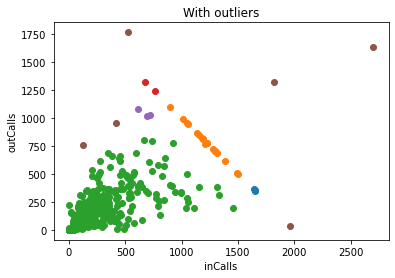

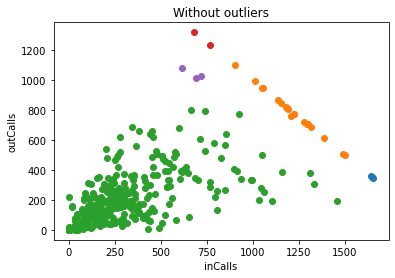

In [16]:
# this is utilizing DBSCAN and setting the clusters by customizing how the clusters would be qualified by setting the
# distance between the points, this uses code that allows the outliers of the dataset to be shown
clustering = DBSCAN(eps=175, min_samples= 2).fit(df)
cs = clustering.labels_
df["cluster"] = cs
c0 = df[df["cluster"] == 0]
c1 = df[df["cluster"] == 1]
c2 = df[df["cluster"] == 2]
c3 = df[df["cluster"] == 3]
c4 = df[df["cluster"] == 4]
c00 = df[df["cluster"] == -1]
plt.figure()
#plot with outliers 
plt.title("With outliers")
plt.scatter(c0[v1], c0[v2])
plt.scatter(c1[v1], c1[v2])
plt.scatter(c2[v1], c2[v2])
plt.scatter(c3[v1], c3[v2])
plt.scatter(c4[v1], c4[v2])
plt.scatter(c00[v1], c00[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()
#plot without outliers 
plt.title("Without outliers")
plt.scatter(c0[v1], c0[v2])
plt.scatter(c1[v1], c1[v2])
plt.scatter(c2[v1], c2[v2])
plt.scatter(c3[v1], c3[v2])
plt.scatter(c4[v1], c4[v2])

plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()

C:\Users\student\AppData\Local\Temp/ipykernel_9608/2727359922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cs


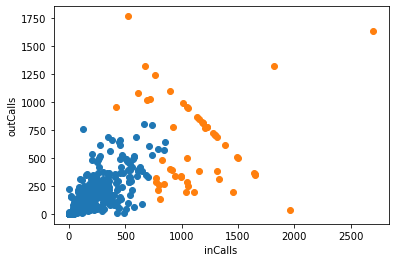

In [17]:
#this cell is running hierachical clustering in which it is picking the amount of clusters itself and finding the best fit
# for the criteria to run the size of clusters 
clustering = AgglomerativeClustering().fit(df)
cs = clustering.labels_
df["cluster"] = cs
c0 = df[df["cluster"] == 0]
c1 = df[df["cluster"] == 1]
#c2 = df[df["cluster"] == 2]
#c3 = df[df["cluster"] == 3]
#c4 = df[df["cluster"] == 4]
# c00 = df[df["cluster"] == -1]
plt.figure()
plt.scatter(c0[v1], c0[v2])
plt.scatter(c1[v1], c1[v2])
#plt.scatter(c2[v1], c2[v2])
#plt.scatter(c3[v1], c3[v2])
#plt.scatter(c4[v1], c4[v2])
# plt.scatter(c00[v1], c00[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()
plt.close()

# Lab Instructions (Part 2)

* Continue to add comments and make the notebook professional with headings and markdown cell explanations
* What does the correlation plot indicate about the relationship between the features? Target variables (PHQ-9 and GAD-7)?
* How does var plot change when numberOfFeatures is higher? How many principal components should be used (the elbow)?
* What percent of variance in the data is covered by the first principal component? Tenth principal component?
* How much variance is plotted by plotting the first two principal components?
* Instead of PHQ-9 and GAD-7 scores, try plotting some different survey features v3. Do they match the clusters?
* Visually, how many clusters exist when plotting the first two principal components? Update number of clusters k accordingly
* What domain-based conclusions can be drawn from clustering the first two principal components?

In [30]:
# this takes the PCA package and preprocessing package from sklearn and inmports it into the notebook
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [31]:
#this creates a correlation matrix from the data from the imported dataset 
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\student\AppData\Local\Temp/ipykernel_9608/871273098.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
inCalls,1.00,0.63,0.94,0.39,0.15,0.37,0.56,0.05,0.04
outCalls,0.63,1.00,0.86,0.38,0.22,0.38,0.55,0.09,0.07
allCalls,0.94,0.86,1.00,0.42,0.20,0.42,0.62,0.07,0.06
inText,0.39,0.38,0.42,1.00,0.38,0.95,0.93,0.05,0.09
outText,0.15,0.22,0.20,0.38,1.00,0.66,0.62,0.03,0.07
allText,0.37,0.38,0.42,0.95,0.66,1.00,0.97,0.05,0.10
allLogs,0.56,0.55,0.62,0.93,0.62,0.97,1.00,0.06,0.10
phq9,0.05,0.09,0.07,0.05,0.03,0.05,0.06,1.00,0.85
gad7,0.04,0.07,0.06,0.09,0.07,0.10,0.10,0.85,1.00


# What does the correlation plot indicate about the relationship between the features? Target variables (PHQ-9 and GAD-7)?
#### The correlation table shows the different variables and how closely correlated that they are. The target variables of PHQ-9 and GAD-7 shows that there does seem to be a fairly strong correlation between the two variables, meaning that these two variables move together whether their data increases or decreases

In [20]:
features = data3[data3.columns[1:-2]]
ids = data3[data3.columns[0:1]]
targets = data3[data3.columns[-2:]]
cnames = features.columns
features.head()
# this cell shows the pieces of data from the data set and prints them to a table in which the values of the feactures are 
# shown as the correlation, percentile, and varience

,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,0.142857,...,1044.461838,595.378697,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0
1,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,0.142857,...,107303.053660,87506.881312,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0
2,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,0.142857,...,224107.095817,218449.207781,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0
3,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,0.142857,...,53971.533653,50730.442089,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0
4,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [33]:
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
sfeatures = pd.DataFrame(np_scaled, columns = cnames)
sfeatures.head()
# this cell of code takes the data from the cell above and normalizes each of the features between the value of 0 and 1

,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,0.000045,0.001576,0.000045,0.000000,0.222222,1.0,0.000000,0.000,0.0,0.0,...,0.000029,0.000029,0.000031,0.000024,0.000019,0.000016,0.000014,0.000013,0.000013,0.6
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,...,0.002951,0.004306,0.004751,0.001856,0.000771,0.000436,0.000360,0.000374,0.000417,0.4
2,0.017641,0.198108,0.017641,0.434450,0.222222,1.0,0.095238,0.152,0.0,0.0,...,0.006162,0.010749,0.013638,0.009505,0.007069,0.005930,0.005387,0.005122,0.004989,0.4
3,0.062112,0.355229,0.062112,0.479390,0.222222,1.0,0.095238,0.280,0.0,0.0,...,0.001484,0.002496,0.002743,0.001495,0.000908,0.000673,0.000582,0.000552,0.000548,0.8
4,0.004332,0.088807,0.004332,0.462298,0.222222,1.0,0.023810,0.064,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [42]:
numberOfFeatures = 4
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF.head()
# this sets the number of features that are used by the pca  and creates dataframes and inputs them into a new fitted model
#

,PC0,PC1,PC2,PC3
0,0.547126,-0.839965,-1.522538,-0.024520
1,0.620034,-1.350896,-2.202705,1.945004
2,1.016386,-1.132049,-0.038627,-0.895660
3,1.112085,-1.171040,0.189946,-1.467948
4,-3.474177,0.100178,1.198440,-0.677831


[0.30028334 0.12899279 0.08451441 0.07264817]


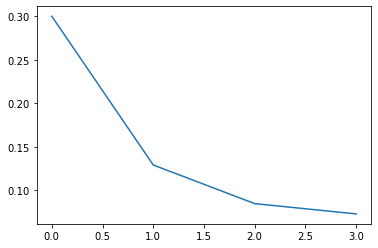

In [43]:
var = pca.explained_variance_ratio_
print(var)
plt.plot(var)

# How does var plot change when numberOfFeatures is higher? How many principal components should be used (the elbow)?
###### The var plot changes in the number of components that it has and how far the graph is extended, the idieal prinicpal compoennts that should be used is somewhere between 2 and 4

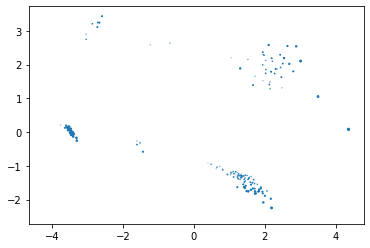

In [48]:
#creates a scatter plot from the the PCA dataframes that have been created 
plt.scatter(pcaDF['PC0'], pcaDF['PC1'], pcaDF['PC2'])
plt.show()
plt.close()

In [25]:
pcaDF2 = pcaDF.assign(target = ids)
pcnames2 = pcnames + ["id"]
pcaDF2.columns = pcnames2
newdf = data2.merge(pcaDF2, on = "id")
print(newdf.columns)
newdf.head()
#shows an index of all of the features in the dataset, then shows the answers to the surveys on the PHQ and GAD, by
# assigning tagets and ids with 

Index(['id', 'appVersion', 'PHQ - Q1', 'PHQ - Q2', 'PHQ - Q3', 'PHQ - Q4',
       'PHQ - Q5', 'PHQ - Q6', 'PHQ - Q7', 'PHQ - Q8', 'PHQ - Q9',
       'PHQ - Total', 'GAD - Q1', 'GAD - Q2', 'GAD - Q3', 'GAD - Q4',
       'GAD - Q5', 'GAD - Q6', 'GAD - Q7', 'GAD - Total', 'Gender', 'Age',
       'StudentStatus', 'PriorDepressionTreatment', 'Remote', 'COVID', 'Group',
       'Timestamp', 'PC0', 'PC1', 'PC2', 'PC3'],
      dtype='object')


,id,appVersion,PHQ - Q1,PHQ - Q2,PHQ - Q3,PHQ - Q4,PHQ - Q5,PHQ - Q6,PHQ - Q7,PHQ - Q8,...,StudentStatus,PriorDepressionTreatment,Remote,COVID,Group,Timestamp,PC0,PC1,PC2,PC3
0,1MZ0A5PA6,stereotype threat,2,1,2,3,2,1,3,0,...,No & I am not a student,Yes,Yes - Full Time,No\/I don't know,White\/Caucasian,"""2021-03-21 00:29:43.016253""",1.942614,2.370818,0.747448,-0.060174
1,E7EEQIEOV,control,1,0,1,1,0,1,1,0,...,No & I am not a student,Prefer not to answer,No - Not At All,Yes,White\/Caucasian,"""2021-03-20 00:16:25.943488""",1.532447,2.470979,-0.157607,-0.893477
2,IHNGBZ4G4,control,1,1,2,3,3,2,2,1,...,No & I am not a student,Yes,No - Not At All,No\/I don't know,White\/Caucasian,"""2021-03-21 22:33:41.260353""",-3.440833,-0.017133,1.601918,-0.759675
3,R8CI0EGMO,stereotype threat,1,2,3,2,2,3,3,0,...,No & I am not a student,Yes,Yes - Full Time,No\/I don't know,White\/Caucasian,"""2021-03-20 05:03:37.222712""",1.811053,-1.765097,1.415834,0.640169
4,FWJ1GB40T,control,2,2,2,3,1,2,3,1,...,Yes & I am a undergrad student,Yes,No - Not At All,No\/I don't know,White\/Caucasian,"""2021-03-20 11:47:32.838462""",1.027875,-1.168439,0.008723,0.119555


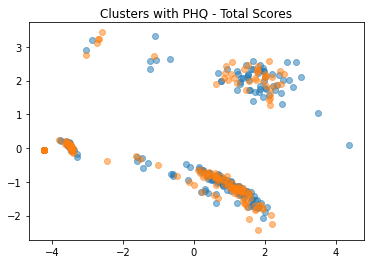

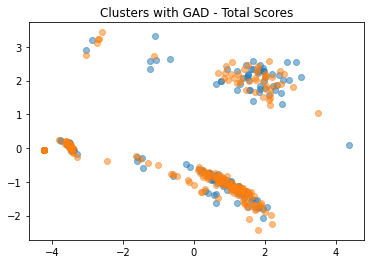

In [49]:
v3 = "PHQ - Total"
newdf1 = newdf[newdf[v3] >= 10]
newdf2 = newdf[newdf[v3] < 10]
#blue positive 
#orange negative
plt.scatter(newdf1['PC0'], newdf1['PC1'], alpha = 0.5, label = "Positive")
plt.scatter(newdf2['PC0'], newdf2['PC1'], alpha = 0.5, label = "Negative")
plt.title("Clusters with " + v3 + " Scores")
plt.show()
plt.close()

v3 = "GAD - Total"
newdf1 = newdf[newdf[v3] >= 10]
newdf2 = newdf[newdf[v3] < 10]

plt.scatter(newdf1['PC0'], newdf1['PC1'], alpha = 0.5)
plt.scatter(newdf2['PC0'], newdf2['PC1'], alpha = 0.5)
plt.title("Clusters with " + v3 + " Scores")
plt.show()
plt.close()
#shows the different plots of clusters based on what features of the survey are being used in this case it show PHQ totals 
# and the GAD totals

In [56]:
pcaDFk = pcaDF
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(pcaDFk)
cs = kmeans.labels_
pcaDFk["cluster"] = cs
pcaDFk.head()
#creates the clusters using KMeans analysis 

,PC0,PC1,PC2,PC3,cluster
0,0.547126,-0.839965,-1.522538,-0.024520,0
1,0.620034,-1.350896,-2.202705,1.945004,0
2,1.016386,-1.132049,-0.038627,-0.895660,0
3,1.112085,-1.171040,0.189946,-1.467948,0
4,-3.474177,0.100178,1.198440,-0.677831,1


## What percent of variance in the data is covered by the first principal component? Tenth principal component?
#### about fifty percent for the first principal component and about seventy percent for the tenth principal component

In [59]:
c0 = pcaDFk[pcaDFk["cluster"] == 0]
print(c0.shape)
c1 = pcaDFk[pcaDFk["cluster"] == 1]
print(c1.shape)
c2 = pcaDFk[pcaDFk["cluster"] == 2]
print(c2.shape)
#sets the shapes of the different clusters 

(112, 5)
(92, 5)
(93, 5)


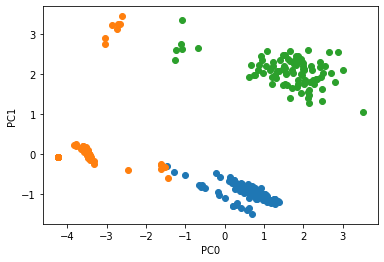

In [61]:
plt.figure()
plt.scatter(c0["PC0"], c0["PC1"])
plt.scatter(c1["PC0"], c1["PC1"])
plt.scatter(c2["PC0"], c2["PC1"])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show()
plt.close()
#plots the  data into their designated clusters

## Visually, how many clusters exist when plotting the first two principal components? Update number of clusters k accordingly
#### there are only three clusters when using the first two principle components 

## Instead of PHQ-9 and GAD-7 scores, try plotting some different survey features v3. Do they match the clusters?
#### the clusters are almost identicle

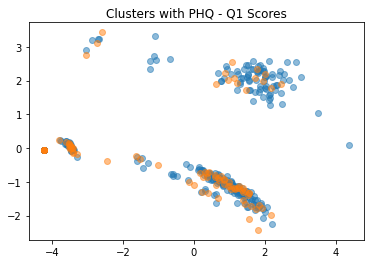

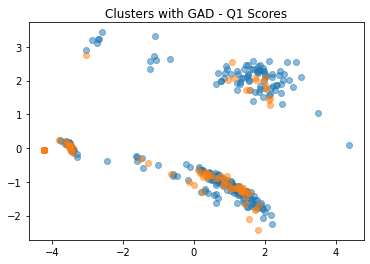

In [67]:
v3 = "PHQ - Q1"
newdf1 = newdf[newdf[v3] >= 1]
newdf2 = newdf[newdf[v3] < 1]
#blue positive 
#orange negative
plt.scatter(newdf1['PC0'], newdf1['PC1'], alpha = 0.5, label = "Positive")
plt.scatter(newdf2['PC0'], newdf2['PC1'], alpha = 0.5, label = "Negative")
plt.title("Clusters with " + v3 + " Scores")
plt.show()
plt.close()

v3 = "GAD - Q1"
newdf1 = newdf[newdf[v3] >= 1]
newdf2 = newdf[newdf[v3] < 1]

plt.scatter(newdf1['PC0'], newdf1['PC1'], alpha = 0.5)
plt.scatter(newdf2['PC0'], newdf2['PC1'], alpha = 0.5)
plt.title("Clusters with " + v3 + " Scores")
plt.show()
plt.close()

## What domain-based conclusions can be drawn from clustering the first two principal components?
#### When plotting the first two principal components the conclusion that can be drawn is that the clusters seem to follow the same patterns through different variables, when looking at the different models they seem to follow the same pattern even though there are different variables being used